In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

1. Скачайте текст произведения «Война и мир»: ссылка на GitHub и Google Drive.
2. Очистите его, оставив только русские буквы и символы пробела.
3. Постройте матрицу переходных вероятностей.

In [2]:
text = ''

for i in range(1,5):
    with open(f'tom_{i}.txt', encoding='utf8') as f:
        tom = f.read().lower()
        tom = re.sub('[^а-я ]', ' ', tom)
        tom = re.sub('\s{2,}', ' ', tom)
        text += tom[1:]

In [3]:
RUS = ' абвгдежзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUS)}
probabilities = np.zeros((len(RUS), len(RUS)))

In [4]:
for letter_1 in RUS:
    for letter_2 in RUS:
        counts = len(re.findall(str(letter_1)+str(letter_2), text))
        probabilities[POS[letter_1], POS[letter_2]] = counts

probabilities = probabilities / probabilities.sum(axis=1)[:, None]
df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))

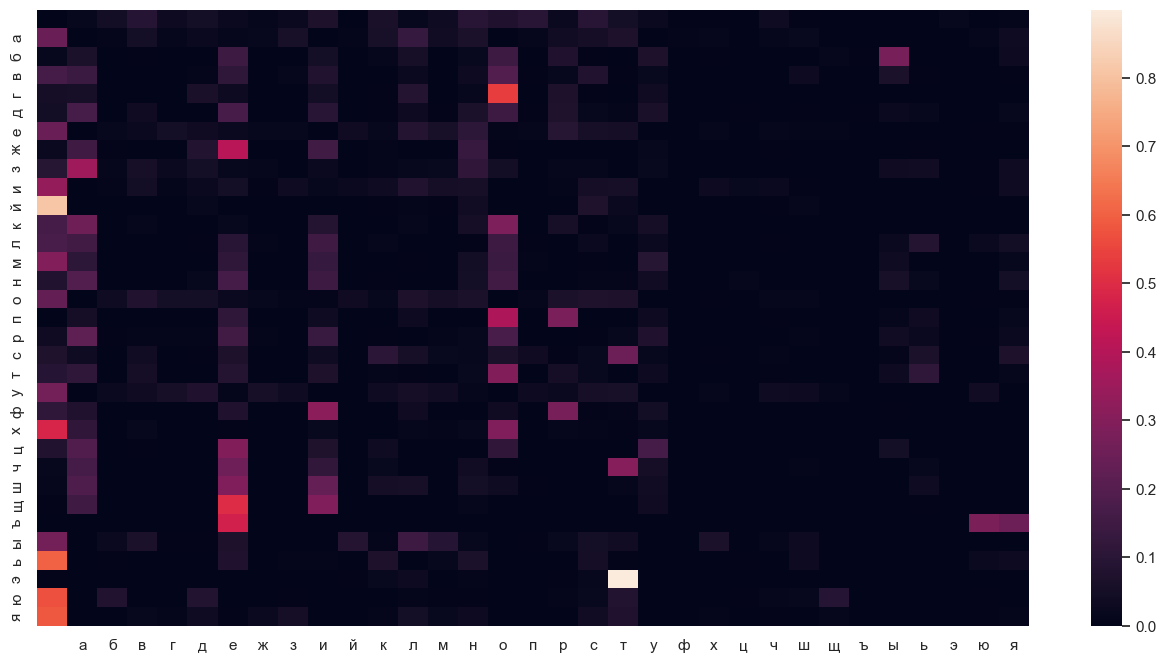

In [5]:
plt.figure(figsize=(16,8))
sns.heatmap(df)
plt.show()

4. Посчитайте вероятность встретить строку из четырёх символов, которая начинается на букву «П» и заканчивается на букву «Р».

In [6]:
proba = 0
for c1 in RUS:
    for c2 in RUS:
        proba += (probabilities[POS['п'], POS[c1]] *
                  probabilities[POS[c1], POS[c2]] *
                  probabilities[POS[c2], POS['р']] / len(RUS))
print(proba)

0.0009784820481786513


5. Используя матрицу переходных вероятностей, сгенерируйте слово, начинающееся с буквы «Б» длиной восемь символов.

In [7]:
slovo = 'б'
while len(slovo) != 8:
    s = np.random.choice(list(RUS), p=probabilities[POS[slovo[-1]]])
    if s != ' ':
        slovo += s
slovo

'бнизысно'

6. Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM.
7. Попробуйте построить через среднее каждой компоненты наивный прогноз ряда.

**В качестве временного ряда возьму график ежедневных изменений индекса биржи Dow-Jones за последние 3 года**

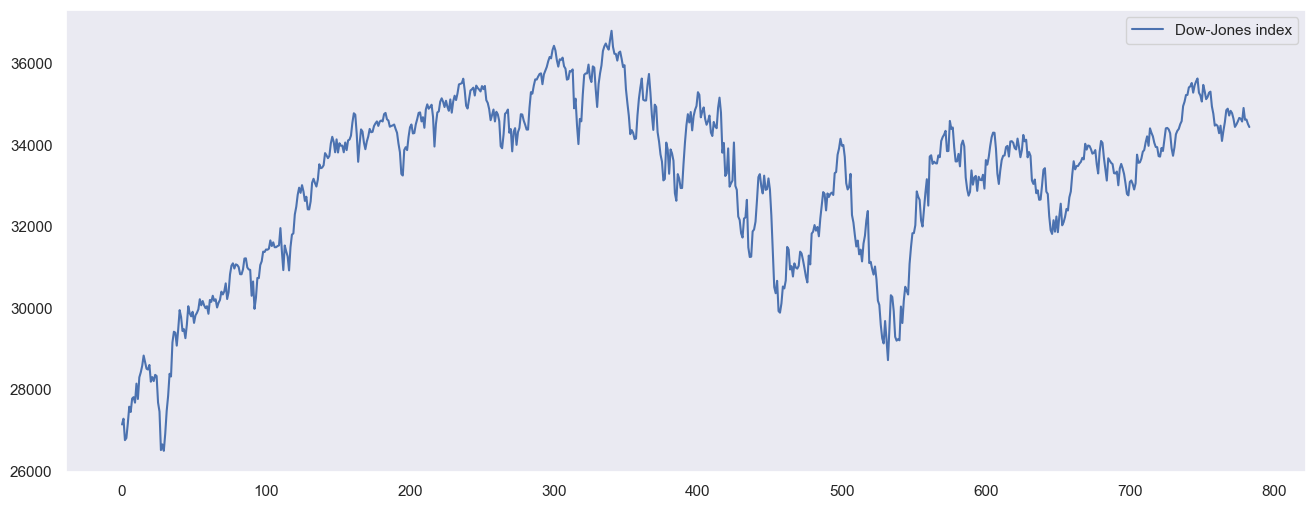

In [8]:
series = np.flip(pd.read_csv('dow-jones.csv').dowjones.values)

plt.figure(figsize=(16,6))
plt.plot(series, label='Dow-Jones index')
plt.legend()
plt.grid();

**Для тестирования модели оставлю 200 последних значений - их я не буду показывать при обучении**

In [9]:
train, test = series[:-200], series[-200:]

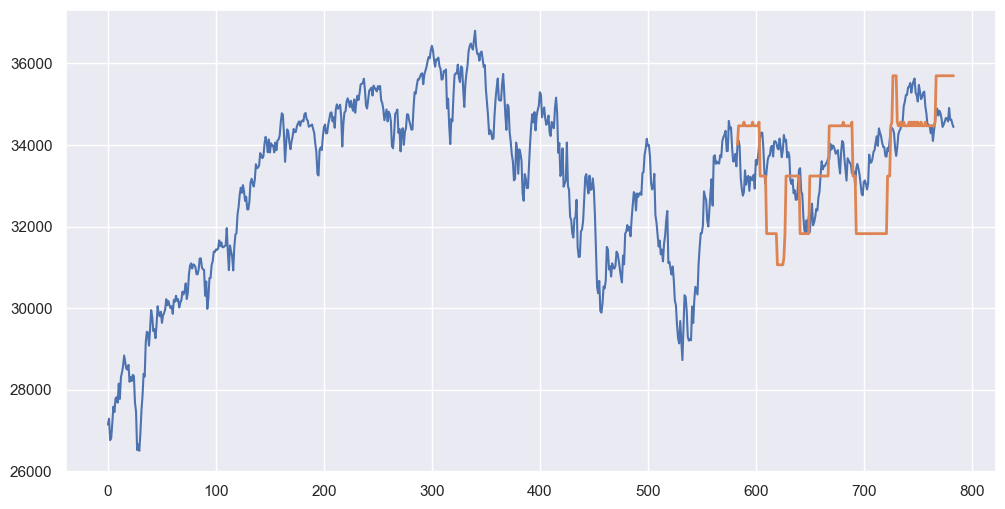

In [10]:
from hmmlearn import hmm

model = hmm.GaussianHMM(n_components=10,
                        covariance_type="diag",
                        n_iter=1000)
train = train.reshape(-1, 1)
model.fit(train)

preds = train[-1]
for i in range(len(test)):
    index = np.abs(model.means_ - preds[-1]).argmin()
    new_pred = np.random.choice(np.ravel(model.means_), p=model.transmat_[index])
    preds = np.append(preds, new_pred)
    
plt.figure(figsize=(12, 6))
plt.plot(series)
plt.plot(range(len(train)-1, len(series)), preds, linewidth=2);